# Calculating Bond Option Adjusted Spread (OAS)

The asset swap spread and the option adjusted spread are widely used as measures of pure credit risk. In this notebook I calculate these quantities. This bond does not have embedded optionality. Hence OAS performs a role of a credit spread.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from financepy.finutils import *
from financepy.products.bonds.FinBond import *

###################################################################
# FINANCEPY BETA Version 0.180 - This build: 22 Sep 2020 at 19:38 #
#     This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy #
###################################################################



In [4]:
issueDate = FinDate(15, 5, 2010)
maturityDate = FinDate(15, 5, 2027)
coupon = 0.02375
freqType = FinFrequencyTypes.SEMI_ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA
face = 100.0 # By setting the face to 100 we expect a price of par to be 100.0

In [6]:
bond = FinBond(issueDate, maturityDate, coupon, freqType, accrualType, face)

In [7]:
print(bond)

OBJECT TYPE: FinBond
ISSUE DATE: SAT 15 MAY 2010
MATURITY DATE: SAT 15 MAY 2027
COUPON: 0.02375
FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: FinDayCountTypes.ACT_ACT_ICMA
FACE AMOUNT: 100.0


## Option Adjusted Spread

In [6]:
from financepy.market.curves.FinDiscountCurveFlat import FinDiscountCurveFlat

In [7]:
liborFlatRate = 0.0275

In [8]:
settlementDate = FinDate(2017, 7, 21)

In [9]:
liborFlatCurve = FinDiscountCurveFlat(settlementDate, liborFlatRate, FinFrequencyTypes.SEMI_ANNUAL)

To get the OAS I need to know the bond price

In [10]:
cleanPrice = 99.780842  # I specified face to be 100 - if face is 1 then this must be 0.99780842

OAS is similar to ASW but actually subtly different measure of credit spread with a different definition and compounding frequency. 

In [11]:
bond.optionAdjustedSpread(settlementDate, cleanPrice, liborFlatCurve) * 10000

-34.975764198354085

## Vectorisations

We plot them both as a function of the Bond clean price.

In [12]:
cleanPrices = np.linspace(70,130,10)

In [13]:
oass = bond.optionAdjustedSpread(settlementDate, cleanPrices, liborFlatCurve)

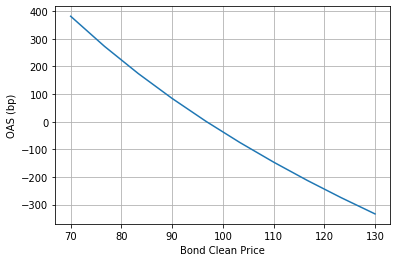

In [14]:
plt.plot(cleanPrices,oass*10000)
plt.xlabel("Bond Clean Price")
plt.ylabel("OAS (bp)")
plt.grid()

Copyright (c) 2020 Dominic O'Kane